In [ ]:
# Bryan Ochoa July 27 2023 bochoa@lbl.gov

# characterization of piezoelectric displacement using
# data gathered using smaract picoscale interferometer gui, pasting results to a .txt file
# function generator producing a 1Hz Sin function, +5V peak to peak

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import signal

In [135]:
with open('C:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\1Hz_5V_Sin.txt', 'r') as file:
    lines = file.readlines()
x = []
y = []

for line in lines:
    values = line.strip().split()
    x.append(float(values[0]))
    y.append(float(values[1]))

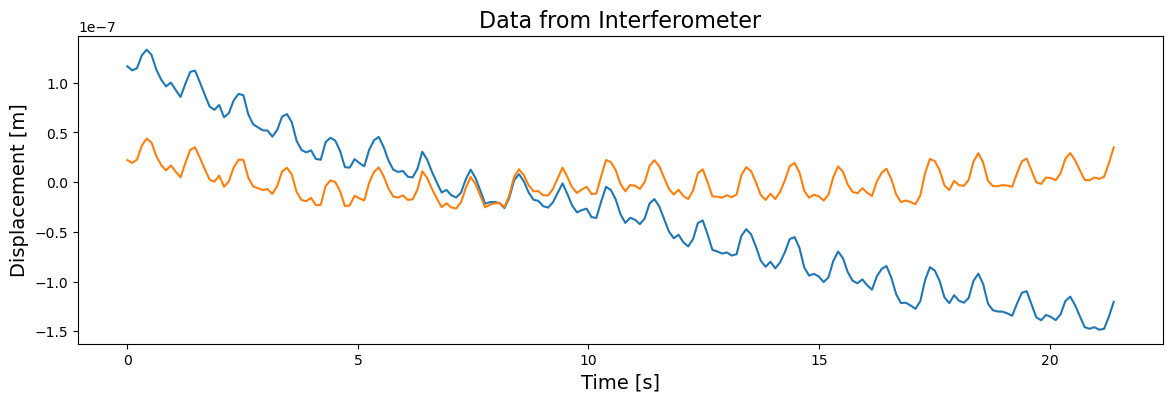

In [136]:

plt.figure(figsize=(14,4))
plt.plot(x,y)
plt.plot(x,signal.detrend(y))
plt.title("Data from Interferometer", fontsize=16)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)
plt.show()

In [138]:
xnp = np.array(x)
ynp = np.array(signal.detrend(y))

yf = np.fft.fft(ynp,2*205)
N = len(yf)
yf = abs(yf) / N
fs = 9.53
xf = np.fft.fftfreq(N, 1/fs)  # Frequency values


print(np.max(yf))
max_indx = np.argmax(np.abs(yf))

# Plot the FFT magnitude
plt.figure(figsize=(15,6))
plt.plot(frequencies[(frequencies>= 0)], (fft_result[(frequencies>= 0)]))
plt.plot(frequencies[signal_frequency_index],fft_result[signal_frequency_index], marker = 'o')
plt.plot(frequencies[35:50],(fft_result[35:50]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Data')
plt.grid(True)
plt.show()


3.4760269384629992e-09


In [112]:

t = ((fft_result[signal_frequency_index]) * 9.53) / (np.pi*2)
original_amplitude = 2.0 *( (fft_result[signal_frequency_index]) / len(ynp))
print(original_amplitude)
print(t)

1.3904107753851997e-08
2.1616233474981094e-06


Original Amplitude of the Signal: 200.1338812198743


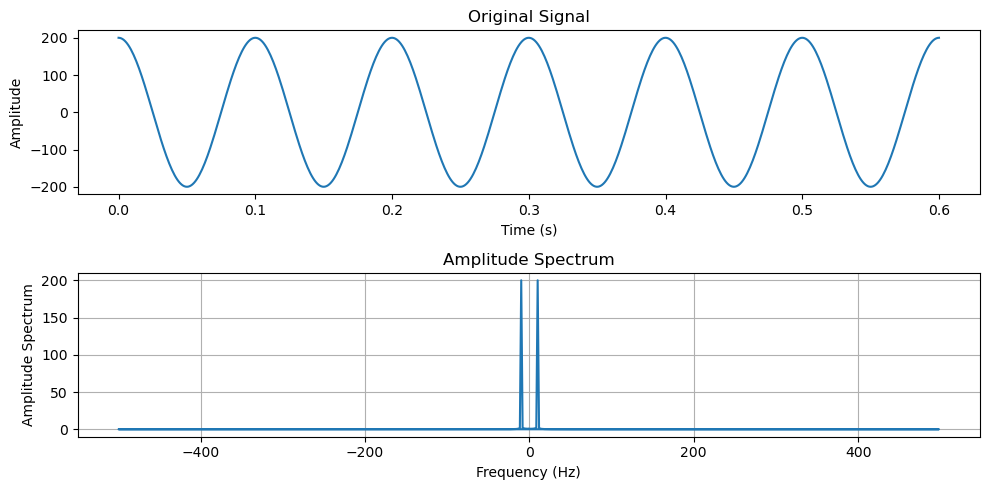

In [131]:

# Sample data (replace this with your own data)
sampling_rate = 1000  # Sample rate in Hz (1 second divided into 1000 intervals)
time = np.linspace(0, 1/sampling_rate * 600, 600)  # Time axis
frequency = 10  # Frequency of the signal (in Hz)
amplitude = 200.0  # Amplitude of the signal
signal = amplitude * np.cos(2 * np.pi * frequency * time)

# Compute the FFT of the signal
yf = np.fft.fft(signal)

# Compute the corresponding frequency axis for the FFT result

xf = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)

# Find the index of the frequency component corresponding to the signal's frequency
signal_frequency_index = np.argmax(np.abs(fft_result))

# Extract the original amplitude of the signal (magnitude of the FFT result at the signal frequency)
original_amplitude = 2.0 * np.abs(fft_result[signal_frequency_index]) / len(signal)

print("Original Amplitude of the Signal:", original_amplitude)

# Plot the signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Plot the amplitude spectrum
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0 * np.abs(yf) / len(signal))
#plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')
plt.title('Amplitude Spectrum')
plt.grid(True)

plt.tight_layout()
plt.show()

1556.2219629963067